## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [7]:
import sys,json
import glob, os
sys.path.append("/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL/derivatives/pilot_project_MAMSL_analyses/code/")


from convert_data import Convert_data

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [103]:
# Load config file ------------------------------------------------------------
with open('../config/config_MAMSL.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified

data=Convert_data(config) # initialize the function

Data for subjects sub-001 can be found here: /cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL//derivatives/data//sub-001


 ### <font color=#4424D6> II. Read raw data </font >

In [110]:
filename={};movement_data={};movement_df={}
for subject_name in config["list_subjects"]:
    filename[subject_name]={};movement_data[subject_name]={};movement_df[subject_name]={}
    
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        filename[subject_name][sess]={};movement_data[subject_name][sess]={};movement_df[subject_name][sess]={}
        
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:#runs[subject_name]["sess0" + str(sess_nb+1)]:
            filename[subject_name][sess][run_name]=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_movement.bin"
            
            movement_data[subject_name][sess][run_name],movement_df[subject_name][sess][run_name]=data.read_movement(subject_name,
                                                                                                                     data_filename=filename[subject_name][sess][run_name])

In [133]:
movement_data[subject_name][sess][run_name].T[0]

array([ 0.66509432, -0.04854369, -0.04368932, ...,  0.6745283 ,
        0.71226418,  0.6981132 ])

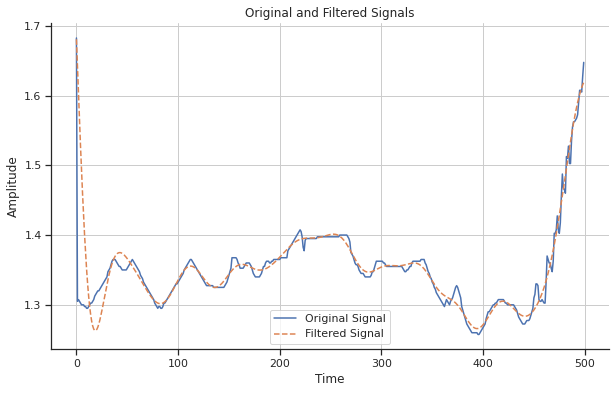

In [146]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
signal=movement_data[subject_name][sess][run_name].T[2,0:500]*0.0025
cutoff_frequency = 10

# Design the Butterworth filter
order = 4  # The order of the filter
b, a = butter(order, cutoff_frequency, btype='low', analog=False,fs=400)

# Apply the filter to the signal
filtered_signal = filtfilt(b, a, signal)
plt.figure(figsize=(10, 6))
plt.plot(signal, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original and Filtered Signals')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
1000*0.1#/2

100.0

 ### <font color=#4424D6> III. Plot rawdata </font >

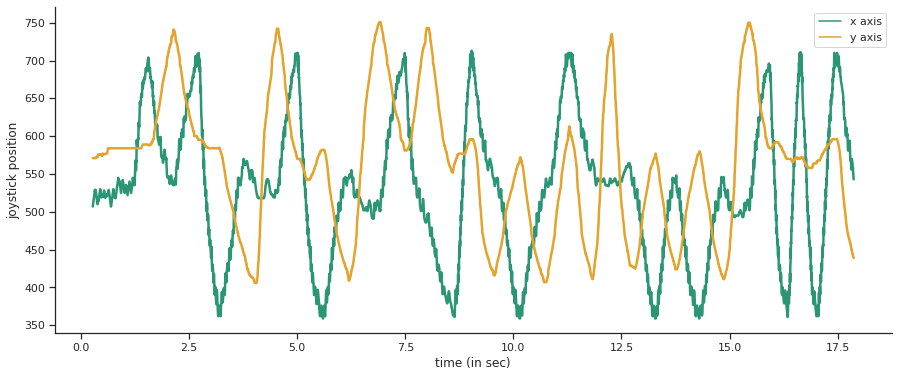

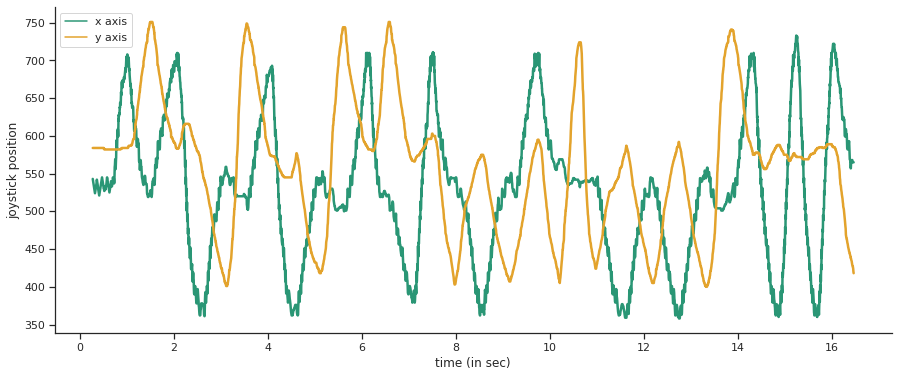

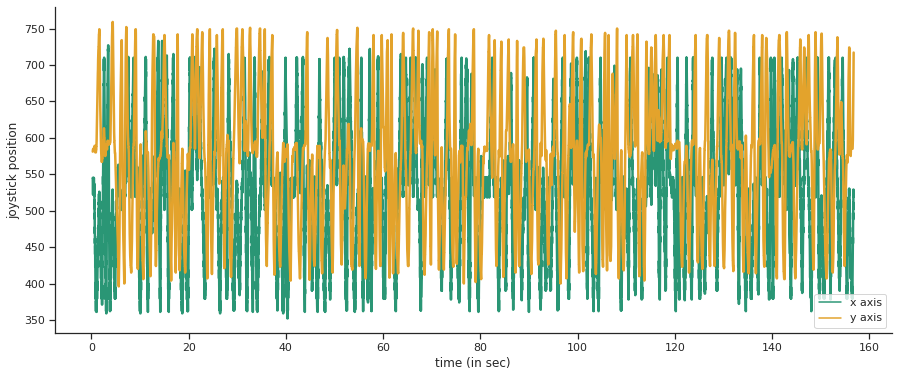

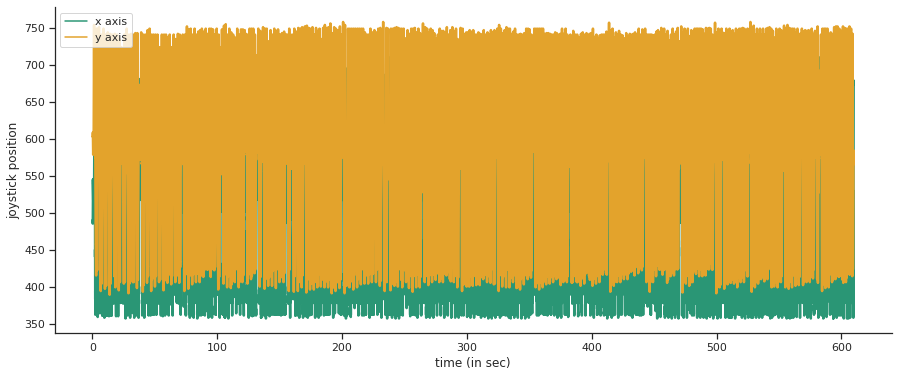

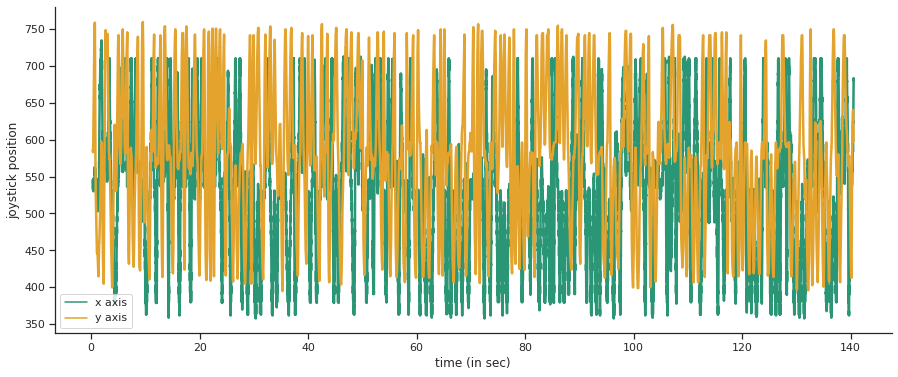

In [124]:
for subject_name in config["list_subjects"]:
    for sess_nb in range(0,1):#len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:
            plot_filename=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_movement_raw.png"
            #print(sess + " " + run_name)
            data.plot_movement(subject_name,
                               movement_df[subject_name ][sess][run_name][100:],
                               sample_rate=0.0025,
                               save_plot=False,
                               plot_filename=plot_filename)